# Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow
## Aurélien Géron

Capítulo 3 - Classificação

# MNIST

<p>O conjunto de dados MNIST é composto por cerca de 70 mil imagens pequenas de algorismos escritos à mão por estudantes do ensino médio e funcionários do US Census Bureau.</p>
<p>A scikit-Learn fornece muitas funções auxiliares para fazer o download de conjuntos de dados populares. O MNIST é um deles.</p>


In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

C:\Users\legia\.conda\envs\Estudos\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
some_digit = X.iloc[360].values
some_digit_image = some_digit.reshape(28,28)

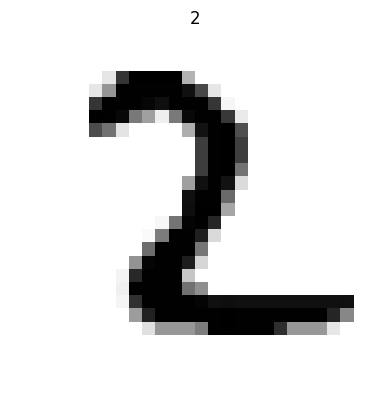

In [7]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.title(y[360])
plt.show()

In [27]:
# Alterando o tipo
import numpy as np
y = y.astype(np.uint8)

<p>Sem devemos criar um conjunto de teste e separa-lo antes de inspecionar os dados com mais atenção. O conjunto de dados MNIST, na verdade, já está dividido em um conjunto de treinamento (as primeiras 60 mil imagens) e em um conjunto de teste (as ultimas 10 mil imagens)</p>
<p>O conjunto de treinamento já está embaralhado, o que é bom, pois isso assegura que todos os folds de validação cruzada serão semelhantes.</p>

In [28]:
X_train, X_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

## Treinando um Classificador Binário

<p>Vamos criar uma clssificador capaz de intificar um 5 e um não 5</p>

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

<p>Um bom ponto de partida é um classificador gradiente descedente estocastico (SGD), usando a classe  <i>SGDClassifier</i> da Scikit-Learn. A vantagem desse classificador é conseguir lidar eficientemente com conjunto de dados muito grandes. Isso ocorre em parte porque o SGD lida com instancias de treinamento de forma independente, uma de cada vez.</p>

In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
sgd_clf = SGDClassifier( random_state=42)

In [32]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

<p>Agora podemos usá-lo para identificar imagens do número 5</p>

C:\Users\legia\.conda\envs\Estudos\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\legia\.conda\envs\Estudos\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


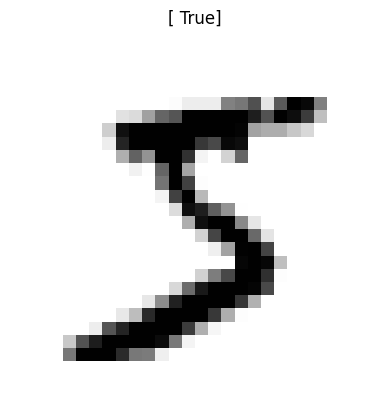

In [36]:
some_digit = X.iloc[0].values
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.title(sgd_clf.predict([some_digit]))
plt.show()

## Cálculo de desempenho
<p>Normalmente avaliar um classificador é bem mais complicado do que avaliar um regressor, existe muitos cálculos e medidas de desempenho disponíveis</p>

### Calculando a acurácia com a validação cruzada
<p>O código a seguir faz a mesma coisa que a função <i><b>cross_val_score()</b></i> da Scikit-Learn e exibe o mesmo resultado</p>

<p><b><i>A cada iteração, o código cria um clone do classificador, treina esse clone nos folds de treinamento e faz predições nos folds de teste. Em seguida, contabiliza o número de predições corretas e gera a proporção de predições corretas.</p></b></i>

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)
result_cross = []
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5.loc[train_index]
    X_test_fold = X_train.loc[test_index] 
    y_test_fold = y_train_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold) 
    n_correct = sum(y_pred == y_test_fold)
    result_cross.append(n_correct / len(y_pred))
    
result_cross = cross_val_score(sgd_clf, X_train, y_train_5, cv=3)
for r in result_cross:
    print(r)
print('Média:',result_cross.mean())

0.962
0.956
0.9665
Média: 0.9615


<p><b>Usaremos a função cross_val_score() para avaliar o modelo SGDClassifier com o método k-fold de validação cruzada em três partes. Lembre-se de que método k-fold de validação cruzada significa dividir o conjunto de treinamento em k-folds (neste caso, três) e, depois, prever e avaliar as predições em cada conjunto utilizando um modelo treinado nos folds restantes

In [80]:
from sklearn.model_selection import cross_val_score
result_cross = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy' )
for r in result_cross:
    print(r)
print('Média:',result_cross.mean())

0.962
0.956
0.9665
Média: 0.9615


vejamos um classificador deixa a desejar e somente classifica todas as imagens na classe "não-5":

In [86]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [89]:
#Estimando a acurácia do modelo
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91 , 0.915, 0.918])

<p><b>Mais de 90% de acurácia! Isso acontece simplesmente porque apenas cerca de 10% das imagens são "5", assim sendo, caso sempre estime que uma imagem não é um 5, terá razão em cerca de 90% das vezes. Você seria melhor que Nostradamus.

Isso demonstra por que a acurácia geralmente não é a medida de desempenho preferida para os classificadores, sobretudo quando você está manipulando conjuntos de dados assimétricos (ou seja, quando algumas classes são muito mais frequentes que outras).

# Matriz de Confusão

<p>Uma forma bem melhor de avaliar o desempenho de um classificador é analisar a matriz de confusão. A ideia geral é contabilizar o número de vezes que as instâncias da classe A são classificadas como classe B. Por exemplo, para saber o número de vezes que o classificador confundiu imagens de 5s com 3s, você verificaria na quinta linha e na terceira coluna da matriz de confusão.

In [92]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [93]:
y_train_pred

array([False, False, False, ..., False, False, False])

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[5375,  111],
       [ 120,  394]], dtype=int64)

<p>Cada linha em uma matriz de confusão representa uma classe real, ao passo que cada coluna representa uma classe prevista. A primeira linha desta matriz considera imagens não-5 (a classe negativa): 5375 delas foram classificadas corretamente como não-5 (elas se chamam verdadeiros negativos), enquanto as 120 restantes foram erroneamente classificadas como 5s (falsos positivos). A segunda linha consi- dera as imagens dos 5s (a classe positiva): 111 foram classificadas erroneamente como não-5s (falsos negativos), ao passo que as 394 restantes foram classificadas perfeitamente como 5s (verdadeiros po- sitivos).